# Week 3

I hope you're getting the hang of things. Today we're going on with the prinicples of data visualization!

## Part 1: Fundamentals of data visualization

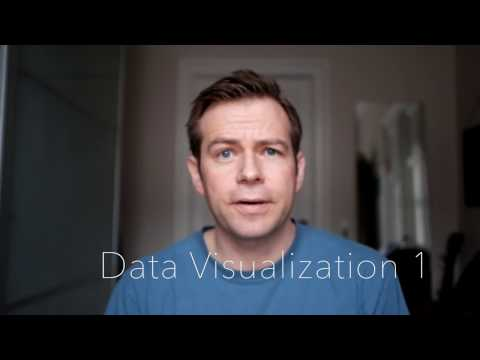

In [2]:
from IPython.display import YouTubeVideo
YouTubeVideo('yiU56codNlI', width=800, height=450)

> *Excercise:* Questions for the lecture. 
>
> * As mentioned earlier, visualization is not the only way to test for correlation. We can (for example) calculate the Pearson correlation. Explain in your own words how the Pearson correlation works and write down it's mathematical formulation. Can you think of an example where it fails (and visualization works)?


The examples from last week are perfect examples where visualisation is important. The formula is:
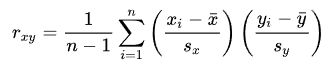
There are other ways to calculate it, but I like this one.

> * What is the difference between a bar-chart and a histogram?

Histogram is the graphical view of the frequency where data is grouped into bins.
A bar chart has individual bars for the whole of the data it represents. 


> * I mention in the video that it's important to choose the right bin-size in histograms. But how do you do that? Do a Google search to find a criterion you like and explain it.

The more data, the more bins. We want as few empty places in the plot as well. 
Alternatively:
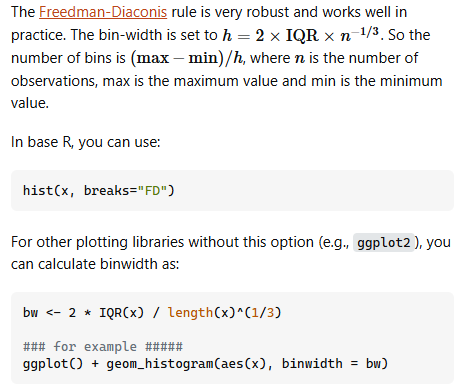

## Part 2: Reading about the theory of visualization

> *Excercise*: Questions for DAOST 
> * Explain in your own words the point of the jitter plot.


To visualise single variable data without multiple values laying on top of each other.


> * Explain in your own words the point of figure 2-3. 
> * The author of DAOST (Philipp Janert) likes KDEs (and think they're better than histograms). And we don't. Sune didn't give a detailed explanation in the video, but now that works to our advantage. We'll ask you to think about this and thereby create an excellent exercise: When can KDEs be misleading? 



> * Sune discussed some strengths of the CDF - there are also weaknesses. Janert writes "CDFs have less intuitive appeal than histograms of KDEs". What does he mean by that?


> * What is a *Quantile plot*? What is it good for. 
> * How is a *Probablity plot* defined? What is it useful for? Have you ever seen one before?
> * One of the reasons we like DAOST is that Janert is so suspicious of mean, median, and related summary statistics. Explain why one has to be careful when using those - and why visualization of the full data is always better. 
> * Sune loves box plots (but not enough to own one of [these](https://images.app.goo.gl/rpozyRX3xu5oFobt8) 😂). When are box plots most useful?
> * The book doesn't mention [violin plots](https://en.wikipedia.org/wiki/Violin_plot). Are those better or worse than box plots? Why?
> * Remember the box-plot part from [this video from last time](https://www.youtube.com/watch?v=DbJyPELmhJc) (the part that starts at 0:56)? Explain in your own words how this video illustrates potential issues even with box-plots? Do violin-plots help with that issue?

## Part 3: Visualizations based on the book

> *Excercise Part 1*: Connecting the dots and recreating plots from DAOST but using our own favorite dataset.
>
> <font color="grey"></font>
> 
> * Let's make a jitter-plot (that is, code up something like **Figure 2-1** from DAOST from scratch), but based on *SF Police data*. My hunch from inspecting the file is that the police-folks might be a little bit lazy in noting down the **exact** time down to the second. So choose a crime-type and a suitable time interval (somewhere between a month and 6 months depending on the crime-type) and create a jitter plot of the arrest times during a single hour (like 13-14, for example). So let time run on the $x$-axis and create vertical jitter.


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv("../data/Police_Department_Incident_Reports_Complete.csv", sep=",")

Crimes at 3-4 a.m during first half year of 2010:  113


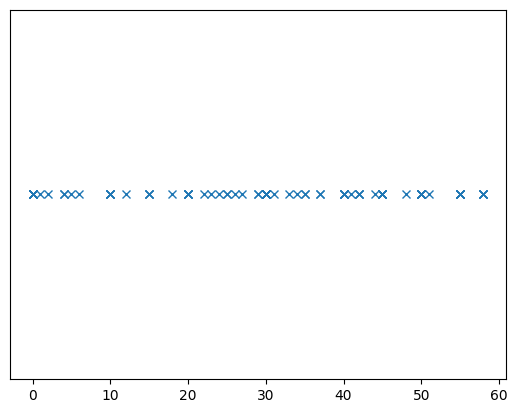

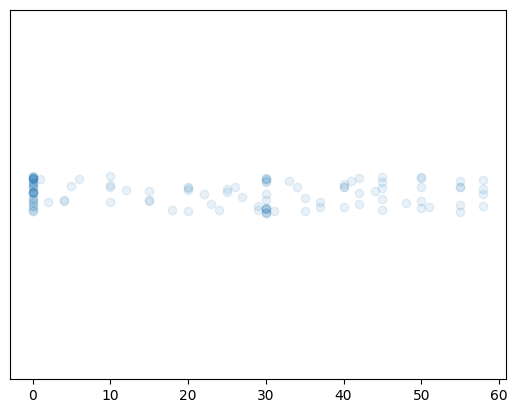

In [4]:
#Jitter plot on crime for period of 1 hour

#Category = VANDALISM
vandalism = data[data['Category'] == 'VANDALISM']

#Year 2010
vandalism_2010 = vandalism[vandalism['Year'] == 2010]
#Month 1-6
vandalism_2010_1_6 = vandalism_2010[(vandalism_2010['Month'] >= 1) & (vandalism_2010['Month'] <= 6)]
#Hour 4
vandalism_2010_1_6_4 = vandalism_2010_1_6[vandalism_2010_1_6['Hour'] == 3]

print(f"Crimes at 3-4 a.m during first half year of 2010: ",len(vandalism_2010_1_6_4))
#Plot of minutes with only x axis
plt.plot(vandalism_2010_1_6_4['Minute'], np.zeros_like(vandalism_2010_1_6_4['Minute']), 'x')
plt.yticks([])

#Jitter plot with transparent circles
y = np.zeros_like(vandalism_2010_1_6_4['Minute'], dtype=float)
## Jitter each points by adding a random number between -0.1 and 0.1
y += np.random.uniform(-0.01,0.01, vandalism_2010_1_6_4['Minute'].shape)
plt.figure()
plt.scatter(vandalism_2010_1_6_4['Minute'], y, alpha=0.1)
plt.ylim(-0.1, 0.1)
plt.yticks([])
plt.show()

Text(0.5, 1.0, 'Vandalism at 3-4 a.m during first half year of 2010')

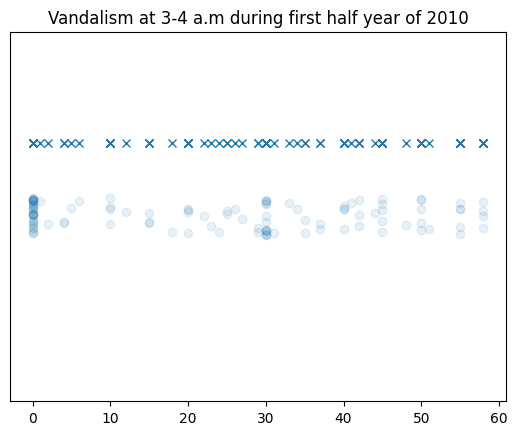

In [5]:
#Combine the two plots
plt.plot(vandalism_2010_1_6_4['Minute'], np.zeros_like(vandalism_2010_1_6_4['Minute']) + 0.04, 'x')
plt.scatter(vandalism_2010_1_6_4['Minute'], y, alpha=0.1)
plt.ylim(-0.1, 0.1)
plt.yticks([])
#Title Vandalism at 3-4 a.m during first half year of 2010
plt.title("Vandalism at 3-4 a.m during first half year of 2010")

> * Last time, we did lots of bar-plots. Today, we'll play around with histograms (creating two crime-data based versions of the plot-type shown in DAOST **Figure 2-2**). I think the GPS data could be fun to see this way. 
>   * This time, pick two crime-types with different geographical patterns **and** a suitable time-interval for each (you want between 1000 and 10000 points in your histogram)
>   * Then take the latitude part of the GPS coordinates for each crime and bin the latitudes so that you have around 50 bins across the city of SF. You can use your favorite method for binning. I like `numpy.histogram`. This function gives you the counts and then you do your own plotting. 


Number of vehicle thefts in 2005:  9067
Number of assaults in 2005:  5031


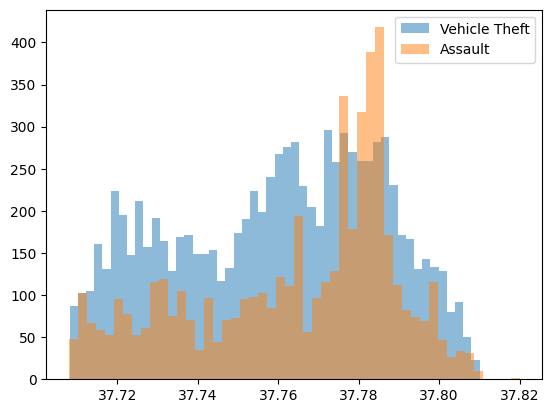

In [13]:
#2 crimes with different geographical patterns
#VEHICLE THEFT & ASSAULT
vehicle_theft = data[data['Category'] == 'VEHICLE THEFT']
assault = data[data['Category'] == 'ASSAULT']

#year 2005, 1-6 months
vehicle_theft_2005 = vehicle_theft[(vehicle_theft['Year'] == 2005) & (vehicle_theft['Month'] >= 1) & (vehicle_theft['Month'] <= 6)]
assault_2005 = assault[(assault['Year'] == 2005) & (assault['Month'] >= 1) & (assault['Month'] <= 6)]


#Number of crimes
print(f"Number of vehicle thefts in 2005: ", len(vehicle_theft_2005))
print(f"Number of assaults in 2005: ", len(assault_2005))

#Histogram of the geographical distribution of the crimes
plt.figure()
plt.hist(vehicle_theft_2005['Latitude (Y)'], bins=50, alpha=0.5, label='Vehicle Theft')
plt.hist(assault_2005['Latitude (Y)'], bins=50, alpha=0.5, label='Assault')
plt.legend()
plt.show()


> * Next up is using the plot-type shown in **Figure 2-4** from DAOST, but with the data you used to create Figure 2.1. There is not a single great way to create kernel density plots in Python. [Here](https://www.geeksforgeeks.org/density-plots-with-pandas-in-python/), you'll finde a pandas based strategy, but you can also use `gaussian_kde` from `scipy.stats` ([for an example, check out this stackoverflow post](https://stackoverflow.com/questions/4150171/how-to-create-a-density-plot-in-matplotlib)) or you can use [`seaborn.kdeplot`](https://seaborn.pydata.org/generated/seaborn.kdeplot.html). There is also another nice tutorial for KDE plots [here](https://medium.com/towards-data-science/histograms-and-density-plots-in-python-f6bda88f5ac0). <font color="gray">Or ask your LLM what it recommends</font>.
> * Now grab 25 random timepoints from the dataset (of 1000-10000 original data) you've just plotted and create a version of Figure 2-4 based on the 25 data points. Does this shed light on why I think KDEs can be misleading? 

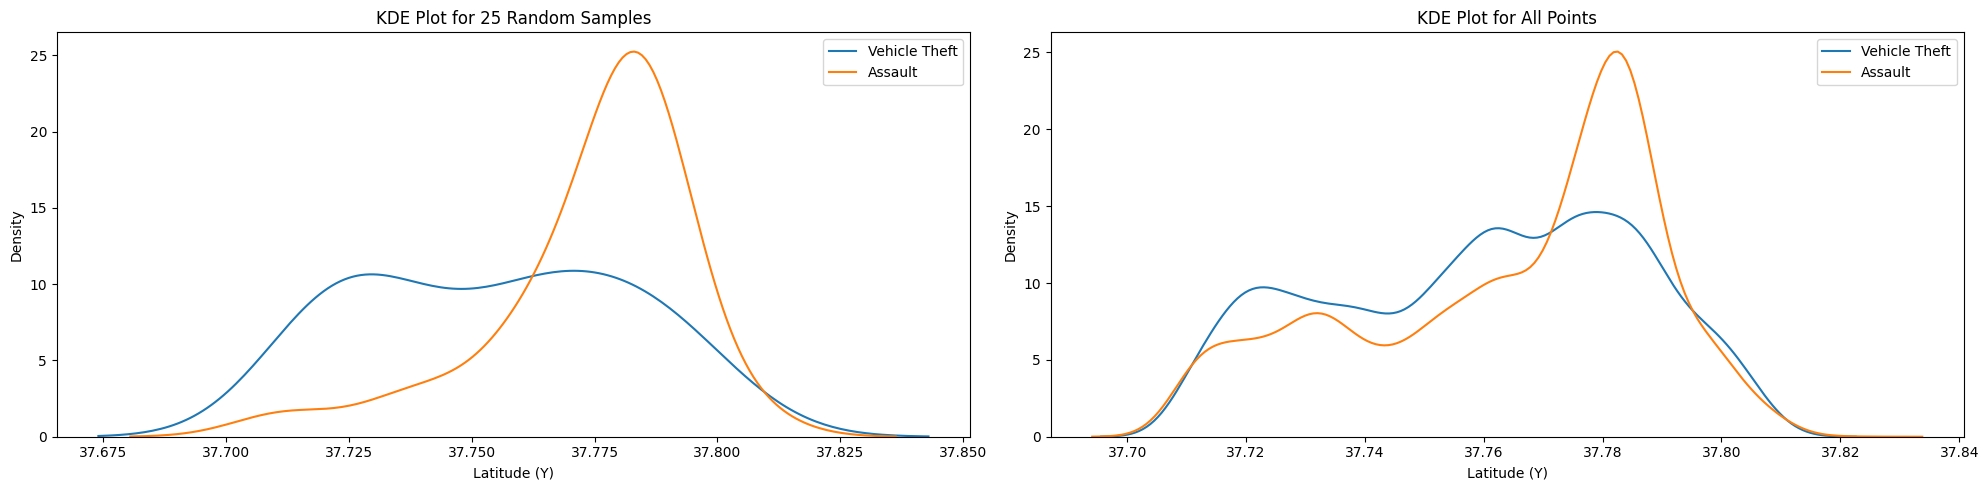

In [40]:
#Seaborn kdeplot
import seaborn as sns
#25 random samples from vehicle_theft_2005 and assault_2005
vehicle_theft_2005_sample = vehicle_theft_2005.sample(25)
assault_2005_sample = assault_2005.sample(25)
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(20, 5))

# KDE plot for 25 random samples
sns.kdeplot(vehicle_theft_2005_sample['Latitude (Y)'], label='Vehicle Theft', ax=axes[0])
sns.kdeplot(assault_2005_sample['Latitude (Y)'], label='Assault', ax=axes[0])
axes[0].legend()
axes[0].set_title('KDE Plot for 25 Random Samples')

# KDE plot with all points
sns.kdeplot(vehicle_theft_2005['Latitude (Y)'], label='Vehicle Theft', ax=axes[1])
sns.kdeplot(assault_2005['Latitude (Y)'], label='Assault', ax=axes[1])
axes[1].legend()
axes[1].set_title('KDE Plot for All Points')

plt.tight_layout()
plt.show()


With so few samples, I don't see how it should realistically depict the correct data. However, if we ar elucky, it resemblences it somewhat. 
I guess the point is that few data points can seem like much than they are in a KDE plot. 

> *Excercise Part 2*:
>
> * Now we'll work on creating two versions of the plot in **Figure 2-11**, but using the GPS data you used for your version of Figure 2-2. Comment on the result. It is not easy to create this plot from scracth.    
>   * **Hint:** Take a look at the `scipy.stats.probplot` function. 


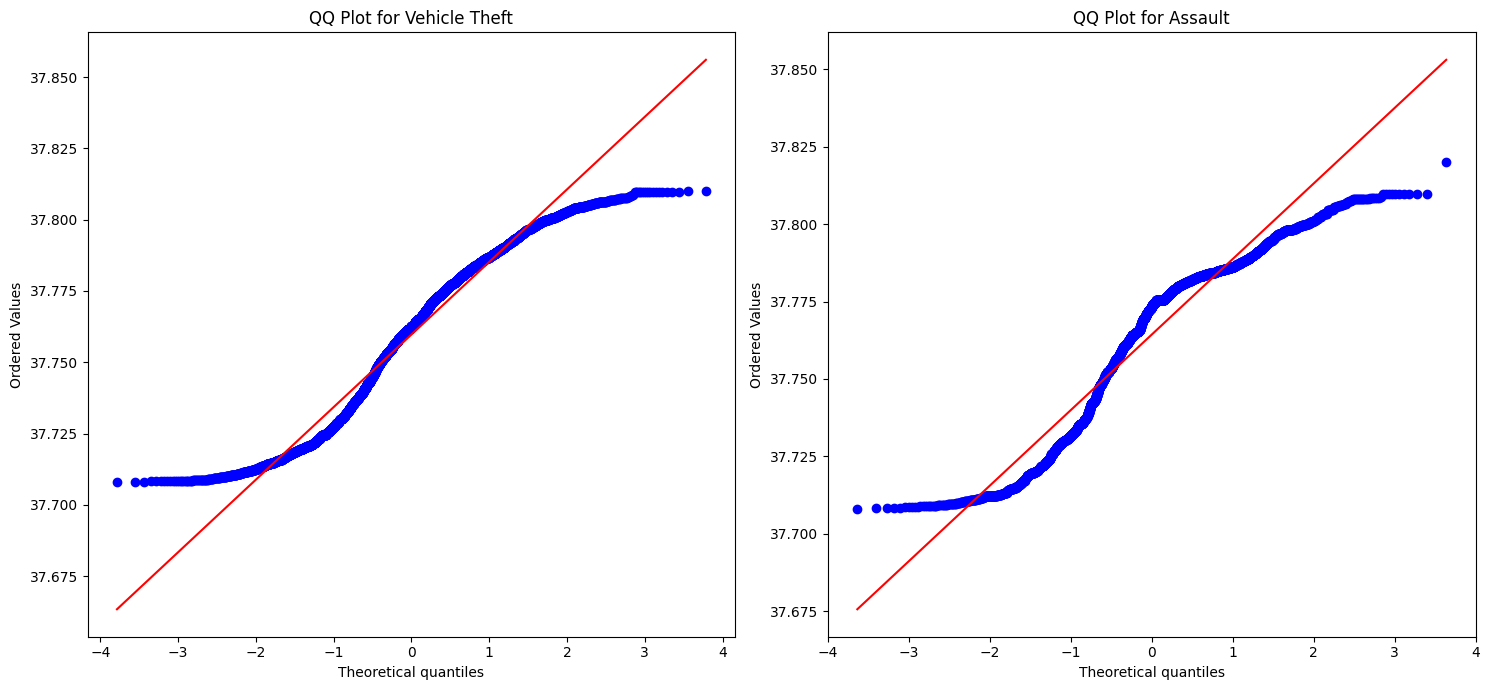

In [46]:
# Import necessary libraries
from scipy import stats
import matplotlib.pyplot as plt

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 7))

# QQ plot for vehicle theft
stats.probplot(vehicle_theft_2005['Latitude (Y)'], dist="norm", plot=axes[0])
axes[0].set_title('QQ Plot for Vehicle Theft')

# QQ plot for assault
stats.probplot(assault_2005['Latitude (Y)'], dist="norm", plot=axes[1])
axes[1].set_title('QQ Plot for Assault')

plt.tight_layout()
plt.show()

Following a normal distribution, the points should lie on the red line. The points are not on the red line - which means that the data does not follow a normal distribution. So location matters.

> * OK, we're almost done, but we need some box plots. Here, I'd like you to use the box plots to visualize fluctuations of how many crimes happen per day. We'll use data from the 15 focus crimes defined last week.
>   * For the full time-span of the data, calulate the **number of crimes per day** within each category for the entire duration of the data.


In [51]:
focuscrimes = set(['WEAPON LAWS', 'PROSTITUTION', 'ROBBERY', 'BURGLARY', 'ASSAULT', 'DRUNKENNESS', 'DRUG/NARCOTIC', 'TRESPASS', 'LARCENY/THEFT', 'VANDALISM', 'VEHICLE THEFT', 'STOLEN PROPERTY'])
#Get number of crimes per day for each category
for category in focuscrimes:
    if category in data['Category'].unique():
        category_data = data[data['Category'] == category]
        category_data = category_data.groupby(['Year', 'Month', 'Day']).size().reset_index(name='Count')
        print(f"Number of crimes per day for {category}: ", category_data['Count'].mean())

Number of crimes per day for WEAPON LAWS:  4.203962545799973
Number of crimes per day for DRUG/NARCOTIC:  17.184849678351057
Number of crimes per day for ASSAULT:  27.288341158059467
Number of crimes per day for ROBBERY:  9.265308787047918
Number of crimes per day for VANDALISM:  22.15114762649974
Number of crimes per day for LARCENY/THEFT:  92.64636849654453
Number of crimes per day for STOLEN PROPERTY:  2.355154965211891
Number of crimes per day for PROSTITUTION:  4.212765957446808
Number of crimes per day for BURGLARY:  17.507303077725613
Number of crimes per day for TRESPASS:  4.931151088867848
Number of crimes per day for VEHICLE THEFT:  20.89748271814269
Number of crimes per day for DRUNKENNESS:  2.2104755008447983


>   * Create a box-and whiskers plot showing the mean, median, quantiles, etc for all 15 crime-types side-by-side. There are many ways to do this. I like to use [matplotlibs's built in functionality](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.boxplot.html), but you can also achieve good results with [seaborn](https://seaborn.pydata.org/generated/seaborn.boxplot.html) or [pandas](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.boxplot.html). <font color="gray">It's also fine to get help from your LLM, but make sure you check that the plot accurately shows the stats about the underlying data!</font>.
>   * What does this plot reveal that you can't see in the plots from last time?


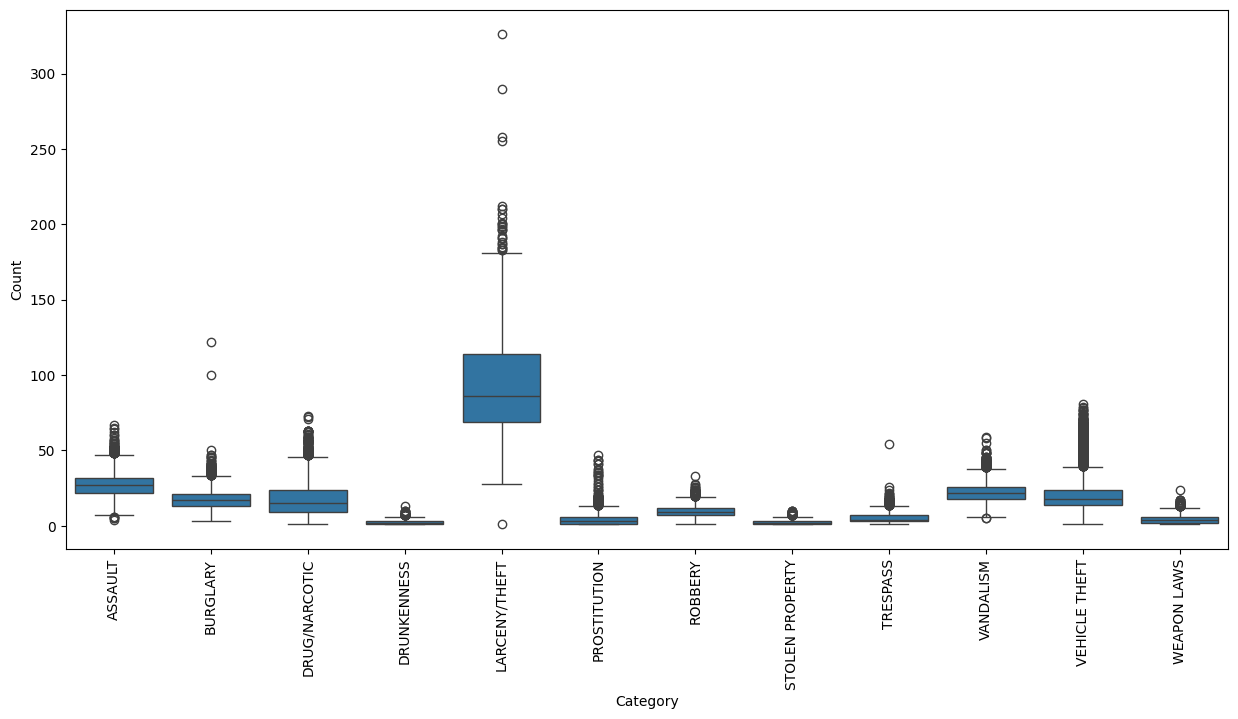

In [ ]:
#Box-and-whiskers plot (boxplot) of mean, median, etc (Seaborn)
# Create a new DataFrame
focuscrimes_data = data[data['Category'].isin(focuscrimes)]
focuscrimes_data = focuscrimes_data.groupby(['Category', 'Year', 'Month', 'Day']).size().reset_index(name='Count') #By using year, month and day we get the number of crimes per day
# box and whiskers plot
plt.figure(figsize=(15, 7))
sns.boxplot(x='Category', y='Count', data=focuscrimes_data)
plt.xticks(rotation=90)
plt.show()



**Most days see about ~100 larceny/theft crimes, which matches the mean of 94.6 crimes per day**

> * Also I want to show you guys another interesting use of box plots. To get started, let's calculate another average for each focus-crime, namely what time of day the crime happens. So this time, the distribution we want to plot is the average time-of-day that a crime takes place. There are many ways to do this, but let me describe one way to do it. 
>   * For datapoint, the only thing you care about is the time-of-day, so discard everything else.
>   * You also have to deal with the fact that time is annoyingly not divided into nice units that go to 100 like many other numbers. I can think of two ways to deal with this.
>     * For each time-of-day, simply encode it as seconds since midnight.
>     * Or keep each whole hour, and convert the minute/second count to a percentage of an hour. So 10:15 $\rightarrow$ 10.25, 8:40 $\rightarrow$ 8.67, etc.
> * Now you can create box-plots to create an overview of *when various crimes occur*. Note that these plot have quite a different interpretation than ones we created in the previous exercise. Cool, right?  

## Part 4: Visualizing geodata with Plotly

So visualizing geodata used to be difficult, but with `Plotly` things have gotten easier. 

Like matplotlib, Plotly is an [open-source data visualization library](https://plotly.com/python/), but it's aimed at making interactive visualizations that can be rendered in a web browser (or jupyter notebook). You can read about it and learn how to install it [here](https://plotly.com/python/getting-started/).

That means that we can easily draw on the fact that the crime data has lots of exciting geo-data attached. The map we're going to be creating is called a **[choropleth map](https://en.wikipedia.org/wiki/Choropleth_map)** (more on these later), which is basically a map, where we color in shapefiles (more on this below) based on some value that we care about. We'll take our inspiration from Plotly's gentle intro to [Choropleth maps](https://plotly.com/python/mapbox-county-choropleth/)

The thing we want to look into is the SF police districts, shown below (image stolen from [this page](https://hoodline.com/2015/07/citywide-sfpd-redistricting-to-take-effect-sunday/)).

![districts from web](https://raw.githubusercontent.com/suneman/socialdata2021/master/files/sfpdfinal.png)

But because we are cool programmers, we want to create our own maps, **with our own information on them**. Let's do it!

> *Exercise*: Let's plot a map with some random values in it. <font color="gray"></font>

<div class="alert alert-block alert-info">
For this exercise, it will be tempting to ask your LLM for a lot of help ... but - again - don't let it do the work for you. Use it as a helper - not an end-to-end solution. There are many new concepts to understand, and doing the exercise yourself is the best way to begin to get the nitty-gritty details of maps and shapefiles under your skin. Once you get the idea of shapefiles and how they work into your human head, it will unlock new & powerful ways of thinking.
</div>

> What we need to do to get going is some random data. Below is a little dictionary with a random value for each district.

In [ ]:
randomdata = {
    'CENTRAL': 0.4821,
    'SOUTHERN': 0.9153,
    'BAYVIEW': 0.3674,
    'MISSION': 0.7542,
    'PARK': 0.6285,
    'RICHMOND': 0.2147,
    'INGLESIDE': 0.05391,
    'TARAVAL': 0.007846,
    'NORTHERN': 0.4938,
    'TENDERLOIN': 0.08127
}

> *Exercise* (continued):
>
> For this exercise, we'll use use the random values above and we'll also need some *shape-files*.
> [Shapefiles can have many different formats](https://en.wikipedia.org/wiki/Shapefile). Because we are brilliant teachers and an all-round standup people, we are sharing the shapefiles as [`geojson`](https://en.wikipedia.org/wiki/GeoJSON), which is an easy-to-use format for shapefiles based on `json`.
>
> * Download the SFPD District shapefiles **[here](https://raw.githubusercontent.com/suneman/socialdata2025/main/files/sfpd.geojson)**
> * Now that you have the shapefiles, you can follow the example here: https://plotly.com/python/mapbox-county-choropleth/ but with the following modifications:
>    * In the example the `id` is a so-called FIPS code. In our case the `id` is the `DISTRICT`
>    * You will have to convert the dictionary of random values I included above to a Pandas dataframe with the right column headings.
>    * The data used in the example has a range between zero and 12. Your data is between $[0,1]$. So you'll need to modify the plotting command to accound for that change.
>    * You should also change the map to display the right zoom level.
>    * And the map should center on San Francisco's `lat` and `lon`.
> * Now you can create your map.

Mine looks something like this (but I've changed the random values to make it more fun, so expect your colors to be different.).



<img src="https://raw.githubusercontent.com/suneman/socialdata2025/main/files/map_example.png" alt="example" style="width:800px;"/>

You're encouraged to play around with other settings, color schemes, etc.

> *Exercise:* But it's crime-data. Let's do something useful and **visualize where it is safest to leave your car on a Sunday**.
> 
> Take a moment to congratulate yourself. You now know how to create cool map plots!
> * Now, we can focus on our main goal: *determine the districts where you should (and should not) leave your car on Sundays*. (Or stated differently, count up the number of thefts.)
> * To do so, first:
>  * Filter the crime dataset by the `DayOfWeek` category and also choose the appropriate crime category.
>  * Aggregate data by police district.
> * To create the plot, remember that your range of data-values is different from before, so you'll have to change the plotly command a bit.
> * Create a nice plot that shows the crime-levels and highlights the safest area. Remember that we want a colorbar to explain what the colors mean ... and all the other formatting needed for a nice plot.
> * Based on your map and analysis, where should you park the car for it to be safest on a Sunday? And where's the worst place?
> * Using visualizatios can help us uncover powerful data-patterns. However, when designing visualizations, we need to be aware of several illusions that can lead viewers to misinterpret the data we are showing (i.e. *perceptual errors*):
>    * Try to change the range of data-values in the plot above. Is there a way to make the difference between district less evident? 
>    * Why do you think perceptual errors are a problem? Try to think of a few examples. You can have a look at this [article](https://www.businessinsider.com/fox-news-obamacare-chart-2014-3?r=US&IR=T) to get some inspiration.
> * <font color="gray">Optional LLM challenge: Use your LLM and your existing code to easily create plots for the same crime type, but different days, and comment on the results.</font>

<div class="alert alert-block alert-info">
For this final exercise, go nuts with using your LLM (but this is only OK if you've already solved the previous one on your own).
</div>